In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
def evaluate_model(y_test, y_pred):
  test_r2 = r2_score(y_test, y_pred)
  test_mae = mean_absolute_error(y_test, y_pred)
  test_mse = mean_squared_error(y_test, y_pred)
  test_rmse = np.sqrt(test_mse)

  print("R2: {}".format(test_r2))
  print("MAE: {}".format(test_mae))
  print("MSE: {}".format(test_mse))
  print("RMSE: {}".format(test_rmse))

# Decision Tree and Random Forest Regression

In this exercise, we will use Decision Tree and Random Forest regression to predict rent prices in Madrid, using a dataset from Idealista, given a number of features.

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Loading the dataset

In [3]:
dataset = pd.read_csv('heart_disease_data.csv')

## Inspect the Data Structure

In [4]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,No,MT
1,No,20.34,No,NaN,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,NaN,VT
2,No,26.58,Yes,NaN,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,NaN,WY
3,No,24.21,No,NaN,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,No,VT
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,NaN,DC


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  object 
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  object 
 3   AlcoholDrinking             212984 non-null  object 
 4   Stroke                      318683 non-null  object 
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  object 
 8   Sex                         319795 non-null  object 
 9   AgeCategory                 319795 non-null  object 
 10  Race                        319795 non-null  object 
 11  Diabetic                    319795 non-null  object 
 12  PhysicalActivity            319795 non-null  object 
 13  GenHealth     

In [6]:
dataset["HeartDisease"].value_counts()
#dataset["AgeCategory"].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

In [7]:
dataset.describe(include=['object']).T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,212984,2,No,191207
Stroke,318683,2,No,306614
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,14,65-69,34143
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


## How to handle binary types?

In [8]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
labelbinarizer = LabelBinarizer()

labelbinarizer.fit(['No', 'Yes'])

dataset['HeartDisease'] = labelbinarizer.transform(dataset['HeartDisease'])

In [9]:
dataset['Smoking'] = labelbinarizer.transform(dataset['Smoking'])
dataset['DiffWalking'] = labelbinarizer.transform(dataset['DiffWalking'])
dataset['PhysicalActivity'] = labelbinarizer.transform(dataset['PhysicalActivity'])
dataset['Asthma'] = labelbinarizer.transform(dataset['Asthma'])
dataset['KidneyDisease'] = labelbinarizer.transform(dataset['KidneyDisease'])

In [10]:
dataset['Stroke'] = dataset['Stroke'].map({'Yes': 1, 'No': 0})
dataset['AlcoholDrinking'] = dataset['AlcoholDrinking'].map({'Yes': 1, 'No': 0})
dataset['SkinCancer'] = dataset['SkinCancer'].map({'Yes': 1, 'No': 0})
dataset['HeartDisease_FamilyHistory'] = dataset['HeartDisease_FamilyHistory'].map({'Yes': 1, 'No': 0})

In [11]:
labelbinarizer = LabelBinarizer()

labelbinarizer.fit(['Female', 'Male'])
dataset['Sex'] = labelbinarizer.transform(dataset['Sex'])

In [12]:
dataset.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory
count,319795.000000,319795.000000,319795.000000,212984.000000,318683.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319446.000000,35263.000000
mean,0.085595,28.327367,0.412477,0.102247,0.037871,3.37171,3.898366,0.138870,0.475273,0.775362,7.097075,0.134061,0.036833,0.093346,0.092306
std,0.279766,6.369381,0.492281,0.302974,0.190886,7.95085,7.955235,0.345812,0.499389,0.417344,1.436007,0.340718,0.188352,0.290917,0.289462
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,31.440000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,119.000000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Criação do DataFrame com a coluna AgeCategory

data = dataset['AgeCategory']
data

0               55-59
1         80 or older
2               65-69
3               75-79
4               40-44
             ...     
319790          60-64
319791          35-39
319792          45-49
319793          25-29
319794    80 or older
Name: AgeCategory, Length: 319795, dtype: object

In [14]:
# Função para converter o intervalo em valor float e substituir "80 or older" por "80"

df_ages = pd.DataFrame(data)

def calcular_media(intervalo):
    if '-' in intervalo:
        inicio, fim = map(int, intervalo.split('-'))
        return (inicio + fim) / 2
    elif intervalo == '80 or older':
        return 80
    else:
        return None

# Aplicando a função para calcular a média em cada intervalo e armazenando em uma nova coluna

df_ages['AgeFloat'] = df_ages['AgeCategory'].apply(calcular_media)
df_ages = pd.DataFrame(df_ages)

print(df_ages)

        AgeCategory  AgeFloat
0             55-59      57.0
1       80 or older      80.0
2             65-69      67.0
3             75-79      77.0
4             40-44      42.0
...             ...       ...
319790        60-64      62.0
319791        35-39      37.0
319792        45-49      47.0
319793        25-29      27.0
319794  80 or older      80.0

[319795 rows x 2 columns]


In [15]:
# Concatenando o DataFrame original com o DataFrame contendo 'AgeFloat' e dropando 'AgeCategory'

dataset = pd.concat([dataset, df_ages], axis=1)
dataset = dataset.drop('AgeCategory', axis=1)

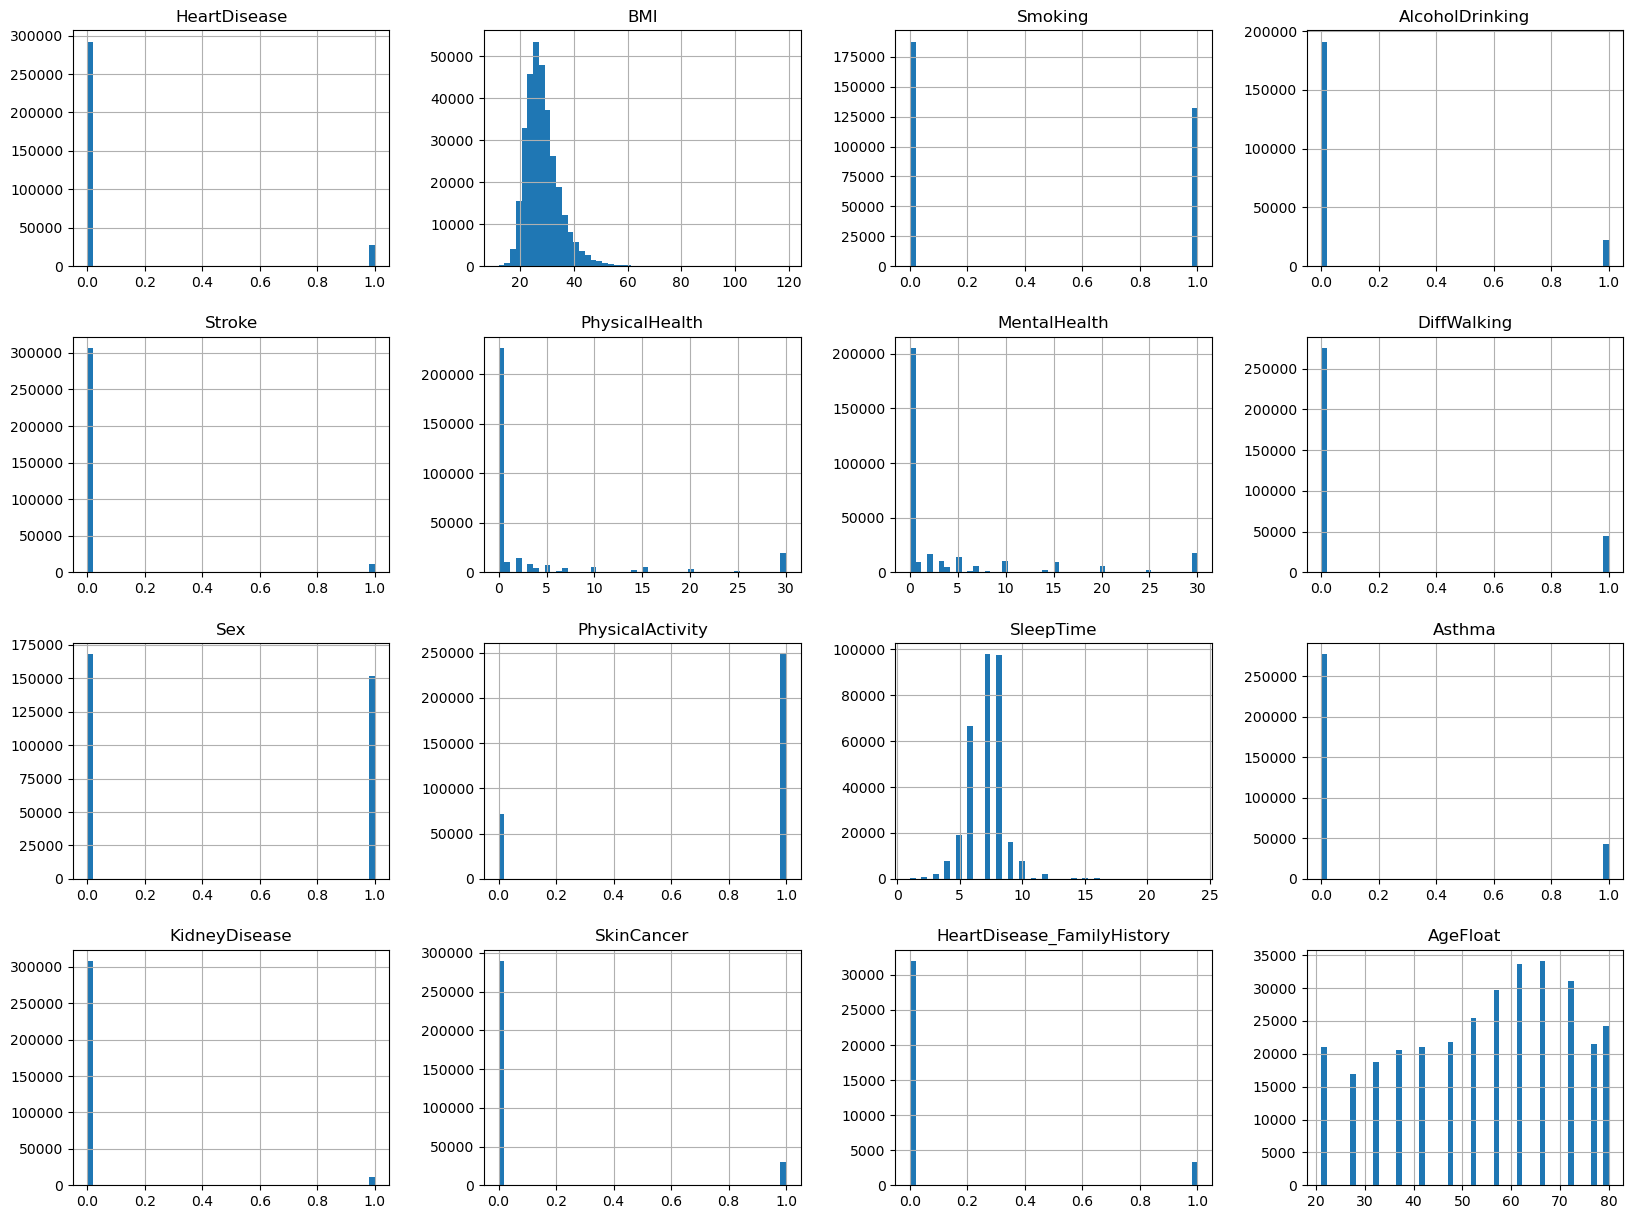

In [16]:

dataset.hist(bins=50, figsize=(20,15))
plt.show()

## Data cleaning

In [17]:
print(dataset.isnull().sum())  # Conta o número de valores NaN em cada coluna

HeartDisease                       0
BMI                                0
Smoking                            0
AlcoholDrinking               106811
Stroke                          1112
PhysicalHealth                     0
MentalHealth                       0
DiffWalking                        0
Sex                                0
Race                               0
Diabetic                           0
PhysicalActivity                   0
GenHealth                          0
SleepTime                          0
Asthma                             0
KidneyDisease                      0
SkinCancer                       349
HeartDisease_FamilyHistory    284532
State                              0
AgeFloat                          59
dtype: int64


In [18]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()

incomplete_rows

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease_FamilyHistory,State,AgeFloat
1,0,20.34,0,NaN,1.0,0.0,0.0,0,0,White,No,1,Very good,7.0,0,0,0.0,NaN,VT,80.0
2,0,26.58,1,NaN,0.0,20.0,30.0,0,1,White,Yes,1,Fair,8.0,1,0,0.0,NaN,WY,67.0
3,0,24.21,0,NaN,0.0,0.0,0.0,0,0,White,No,0,Good,6.0,0,0,1.0,0.0,VT,77.0
4,0,23.71,0,0.0,0.0,28.0,0.0,1,0,White,No,1,Very good,8.0,0,0,0.0,NaN,DC,42.0
5,1,28.87,1,0.0,0.0,6.0,0.0,1,0,Black,No,0,Fair,12.0,0,0,0.0,NaN,PA,77.0


In [19]:
# In this cases we can do the following
#dataset = dataset.dropna(subset=["Rooms"])    # option 1 remove entries
#dataset = dataset.drop("Rooms", axis=1)      # option 2 remove column
#median = dataset["Rooms"].median()           # option 3 replace with median

dataset["AlcoholDrinking"].fillna(0, inplace=True)  # Substituindo os valores NaN por 0
dataset["Stroke"].fillna(0, inplace=True)
dataset["SkinCancer"].fillna(0, inplace=True)
dataset["HeartDisease_FamilyHistory"].fillna(0, inplace=True)
dataset["AgeFloat"].fillna(0, inplace=True)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HeartDisease                319795 non-null  int64  
 1   BMI                         319795 non-null  float64
 2   Smoking                     319795 non-null  int64  
 3   AlcoholDrinking             319795 non-null  float64
 4   Stroke                      319795 non-null  float64
 5   PhysicalHealth              319795 non-null  float64
 6   MentalHealth                319795 non-null  float64
 7   DiffWalking                 319795 non-null  int64  
 8   Sex                         319795 non-null  int64  
 9   Race                        319795 non-null  object 
 10  Diabetic                    319795 non-null  object 
 11  PhysicalActivity            319795 non-null  int64  
 12  GenHealth                   319795 non-null  object 
 13  SleepTime     

## Handling Text and Categorical Attributes

In [20]:
age_cat = dataset[["AgeFloat"]]
age_cat[:10]

,AgeFloat
0,57.0
1,80.0
2,67.0
3,77.0
4,42.0
5,77.0
6,72.0
7,80.0
8,80.0
9,67.0


In [21]:
dataset["State"].unique()

array(['MT', 'VT', 'WY', 'DC', 'PA', 'AK', 'KY', 'DE', 'CA', 'NM', 'WI',
       'VA', 'IN', 'IL', 'OR', 'MS', 'FL', 'OK', 'TN', 'LA', 'HI', 'AZ',
       'WA', 'NE', 'AL', 'MO', 'UT', 'NH', 'OH', 'NV', 'IA', 'KS', 'ID',
       'GA', 'MA', 'AR', 'MD', 'MI', 'CT', 'NJ', 'WV', 'ME', 'MN', 'CO',
       'TX', 'NY', 'SC', 'NC', 'SD', 'RI', 'ND'], dtype=object)

In [22]:
from sklearn.preprocessing import OneHotEncoder
#cat_encoder = OneHotEncoder()
#race_cat_1hot = cat_encoder.fit_transform(type_cat)
#race_cat_1hot

def OHE(df, column_name):
    dummy_dataset = pd.get_dummies(df[column_name], prefix = column_name)
    df = pd.concat([df, dummy_dataset], axis = 1)
    df.drop(column_name, axis = 1, inplace = True)
    del dummy_dataset

    return df

In [23]:
dataset = OHE(dataset, "AgeFloat")

In [24]:
dataset = OHE(dataset, 'Sex')

In [25]:
dataset = OHE(dataset, 'Race')

In [26]:
dataset = OHE(dataset, 'Diabetic')

In [27]:
dataset = OHE(dataset, 'GenHealth')

In [28]:
dataset = OHE(dataset, 'State')

In [29]:
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

dataset.head().T

,0,1,2,3,4
HeartDisease,0.00,0.00,0.00,0.00,0.00
BMI,16.60,20.34,26.58,24.21,23.71
Smoking,1.00,0.00,1.00,0.00,0.00
AlcoholDrinking,0.00,0.00,0.00,0.00,0.00
Stroke,0.00,1.00,0.00,0.00,0.00
PhysicalHealth,3.00,0.00,20.00,0.00,28.00
MentalHealth,30.00,0.00,30.00,0.00,0.00
DiffWalking,0.00,0.00,0.00,0.00,1.00
PhysicalActivity,1.00,1.00,1.00,0.00,1.00
SleepTime,5.00,7.00,8.00,6.00,8.00


In [30]:
dataset.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'HeartDisease_FamilyHistory', 'AgeFloat_0.0', 'AgeFloat_21.0',
       'AgeFloat_27.0', 'AgeFloat_32.0', 'AgeFloat_37.0', 'AgeFloat_42.0',
       'AgeFloat_47.0', 'AgeFloat_52.0', 'AgeFloat_57.0', 'AgeFloat_62.0',
       'AgeFloat_67.0', 'AgeFloat_72.0', 'AgeFloat_77.0', 'AgeFloat_80.0',
       'Sex_0', 'Sex_1', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL

## Select dependent and independent variables

In [31]:
feature_cols = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'PhysicalActivity',
       'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer',
       'HeartDisease_FamilyHistory', 'AgeFloat_0.0', 'AgeFloat_21.0',
       'AgeFloat_27.0', 'AgeFloat_32.0', 'AgeFloat_37.0', 'AgeFloat_42.0',
       'AgeFloat_47.0', 'AgeFloat_52.0', 'AgeFloat_57.0', 'AgeFloat_62.0',
       'AgeFloat_67.0', 'AgeFloat_72.0', 'AgeFloat_77.0', 'AgeFloat_80.0',
       'Sex_0', 'Sex_1', 'Race_American Indian/Alaskan Native', 'Race_Asian',
       'Race_Black', 'Race_Hispanic', 'Race_Other', 'Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'GenHealth_Excellent',
       'GenHealth_Fair', 'GenHealth_Good', 'GenHealth_Poor',
       'GenHealth_Very good', 'State_AK', 'State_AL', 'State_AR', 'State_AZ',
       'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL',
       'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_ME',
       'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC',
       'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM', 'State_NV',
       'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI',
       'State_SC', 'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA',
       'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY']

X = dataset[feature_cols]  # Features
y = dataset['HeartDisease']  # Target variable

## Apply one hot encoder to data

In [32]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder

#cat_attribs = []
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_attribs)], remainder='passthrough')
#X = np.array(ct.fit_transform(X))

## Splitting the dataset into the Training set and Test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Training the Multiple Linear Regression model on the Training set

---



In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

 ## Inspecting the intercept (constant) and the coefficients (slopes)

In [35]:
intercept = regressor.intercept_
print("Intercept: {}".format(intercept))

coefficient = regressor.coef_
print("coefficient: {}".format(coefficient))

Intercept: -8342652801.956224
coefficient: [ 1.72108929e-04  2.31259778e-02 -1.27512994e-02  1.72407237e-01
  4.24810137e-04 -1.32682190e-04  3.31511787e-02  1.23773515e-03
 -9.58834211e-04  1.44021373e-02  9.33465290e-02  1.80471155e-02
  6.42160776e-04 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09
 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09
 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09
 -1.06672844e+09 -1.06672844e+09 -1.06672844e+09  7.79924262e+09
  7.79924262e+09 -7.48525247e+09 -7.48525247e+09 -7.48525247e+09
 -7.48525247e+09 -7.48525247e+09 -7.48525247e+09  3.01241911e+09
  3.01241911e+09  3.01241911e+09  3.01241911e+09  5.93549310e+09
  5.93549310e+09  5.93549310e+09  5.93549310e+09  5.93549310e+09
  1.47478884e+08  1.47478884e+08  1.47478884e+08  1.47478884e+08
  1.47478884e+08  1.47478884e+08  1.47478884e+08  1.47478884e+08
  1.47478884e+08  1.47478884e+08  1.47478884e+08  1.47478884e+08
  1.47478884e+08  1.47478884e+08  1.47478884e+0

## Predicting the Test set results

In [36]:
y_pred = regressor.predict(X_test)
print(y_pred)

[-2.62327194e-02 -3.12929153e-02 -1.62124634e-04 ...  1.08432770e-03
  9.48162079e-02  3.62023354e-01]


## Evaluating the model with R2, MAE, MSE and RMSE

In [37]:
evaluate_model(y_test, y_pred)

R2: 0.1469468903025819
MAE: 0.14471228377423442
MSE: 0.06806240250228889
RMSE: 0.26088772010634936


## Visualize predicted VS actual data comparison

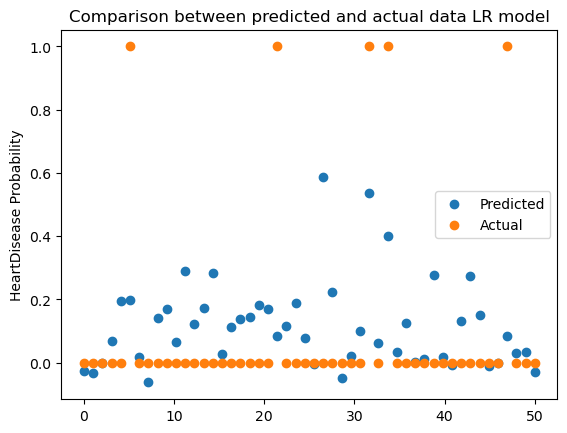

In [38]:
y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("HeartDisease Probability")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

## Training the Decision Tree Regression model on the Training set

R2: 0.09780743316078899
MAE: 0.14225655955669209
MSE: 0.07198308396128388
RMSE: 0.2682966342712556


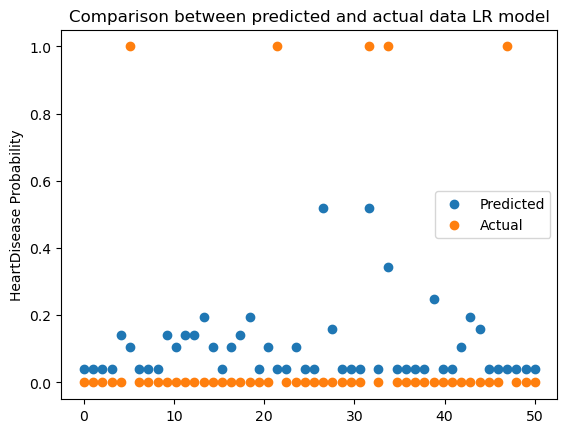

In [39]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=4, random_state=0)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_test, y_pred)

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("HeartDisease Probability")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()

## Visualizing the Decision Tree

In [40]:
from sklearn import tree

#plt.figure(figsize=(12, 12))
#tree.plot_tree(regressor, fontsize=6)
#plt.savefig('tree_high_dpi', dpi=100)

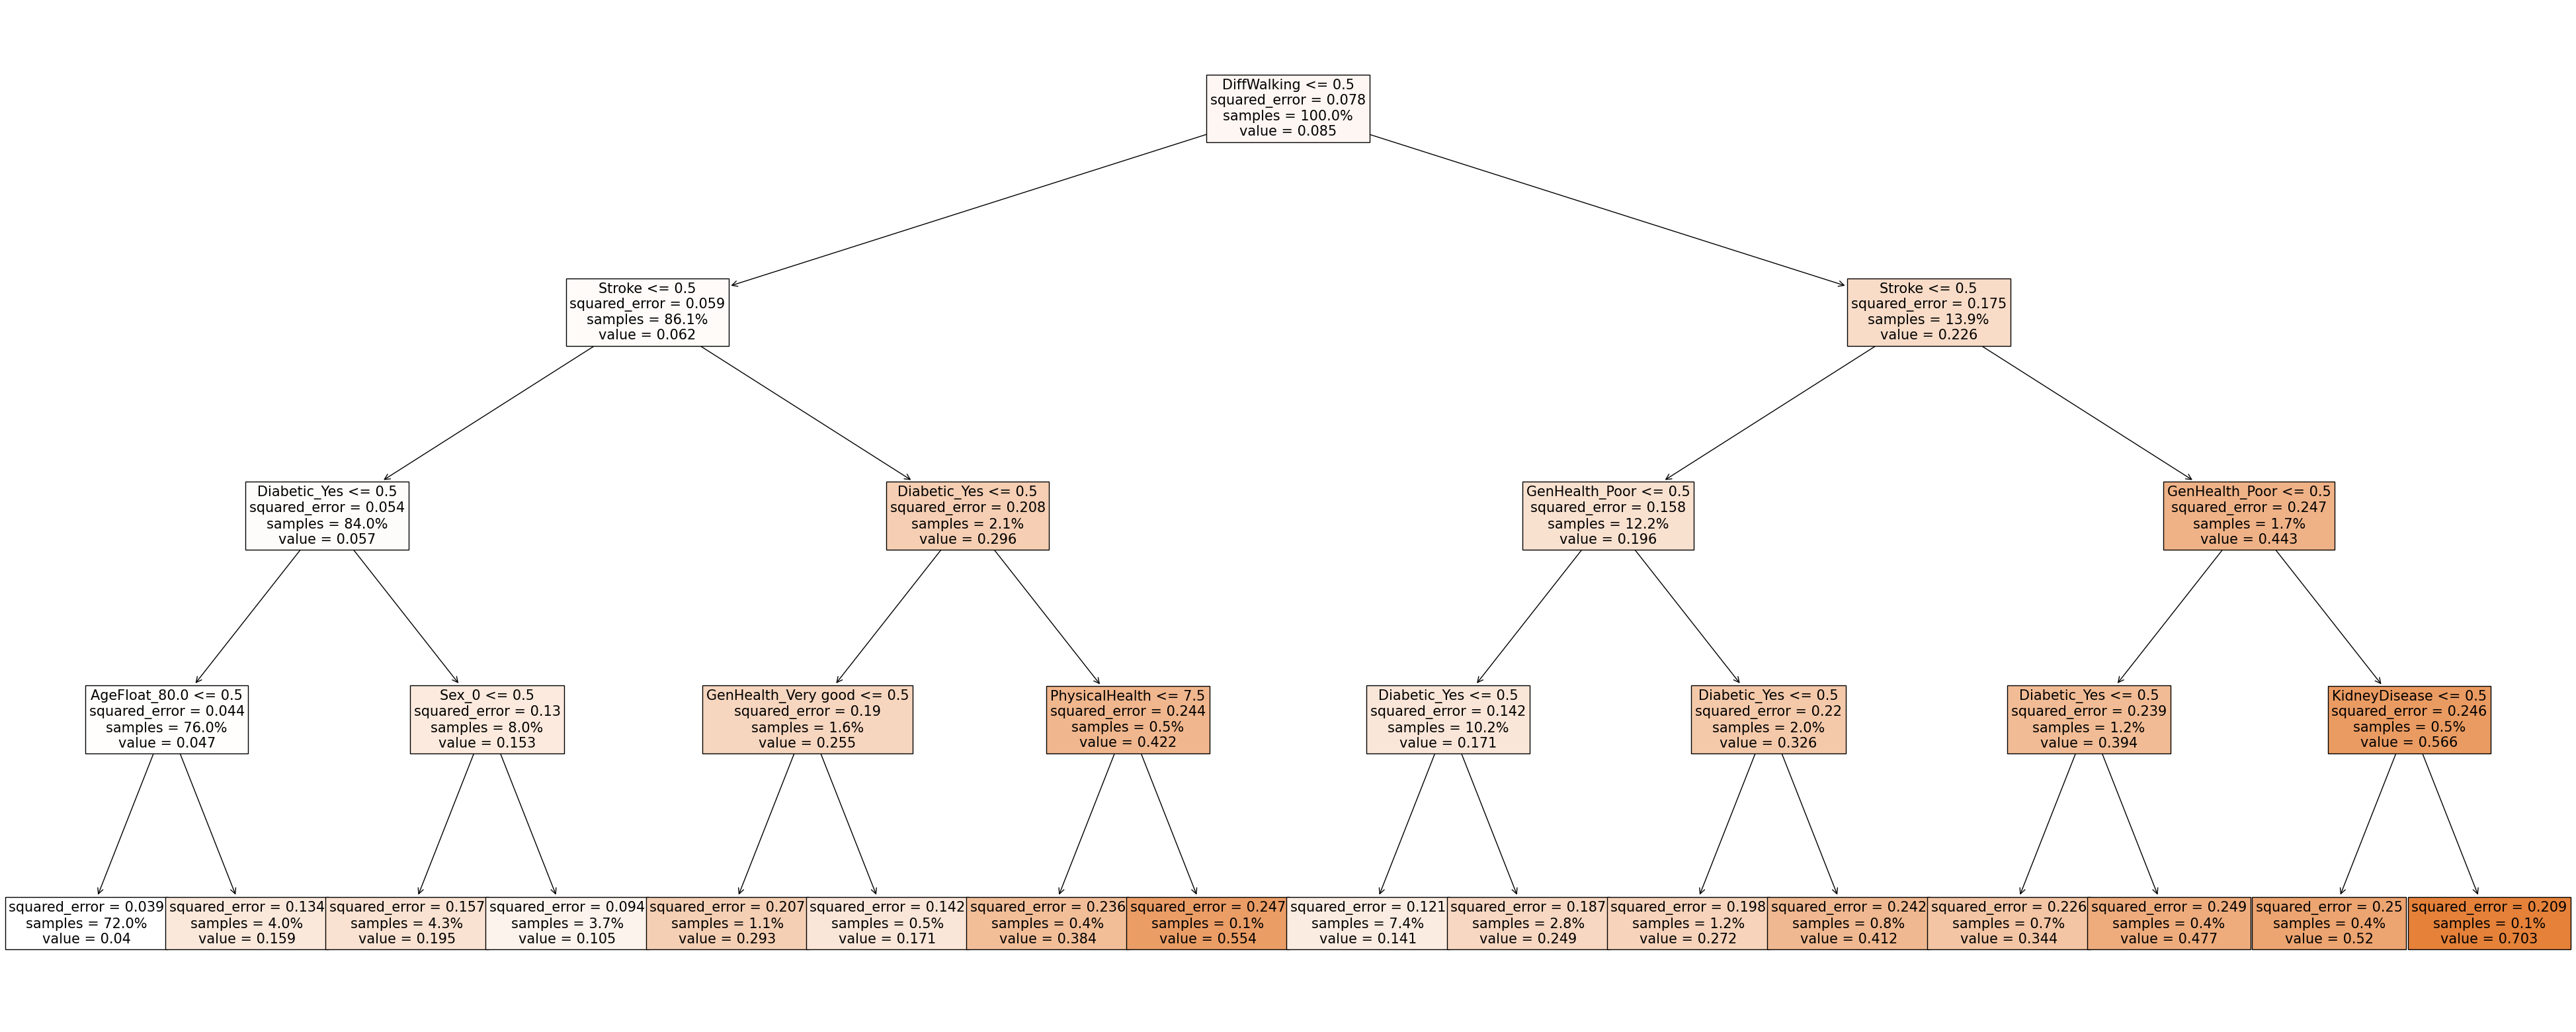

In [41]:
fig, ax = plt.subplots(figsize=(50,20))
tree.plot_tree(regressor,
               ax = ax,
               fontsize = 15,
               proportion=True,
               filled = True,
               feature_names = X_test.columns);

## Training the Random Forest Regression model on the Training set

R2: 0.06347074116123463
MAE: 0.13356755214215854
MSE: 0.0747226997306933
RMSE: 0.2733545312057097


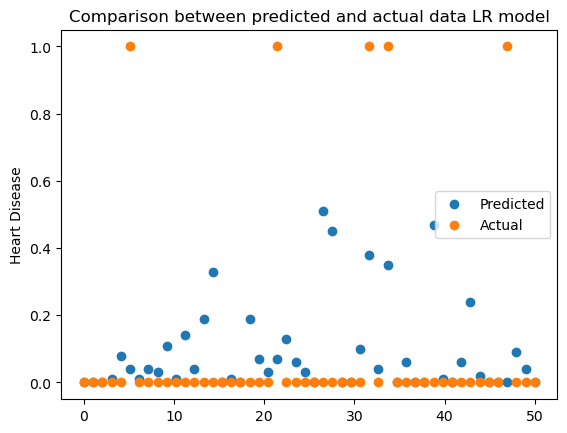

[2.03121723e-01 2.18589468e-02 8.38149753e-03 2.61135722e-02
 4.95720026e-02 4.42211413e-02 4.08305142e-02 2.24281415e-02
 7.57753100e-02 1.63811832e-02 1.22321493e-02 1.83427984e-02
 2.84760305e-03 1.23331746e-04 6.74223116e-04 8.32325245e-04
 1.25860140e-03 1.81861937e-03 2.34041307e-03 2.95372420e-03
 3.88686050e-03 5.22003640e-03 6.62473744e-03 8.35282307e-03
 1.02432217e-02 1.03526023e-02 1.36839382e-02 9.92104372e-03
 8.84272641e-03 3.62776818e-03 2.30290667e-03 7.52240125e-03
 6.67442739e-03 4.97408002e-03 1.13957918e-02 3.93154343e-03
 3.44245329e-03 1.72666461e-02 9.26201150e-04 5.66272838e-03
 9.66434418e-03 7.96935433e-03 9.81122630e-03 7.42869573e-03
 5.35972539e-03 5.04857678e-03 5.11049553e-03 5.43027234e-03
 5.52314068e-03 5.17367466e-03 5.07502314e-03 5.03459407e-03
 5.33032027e-03 5.10795146e-03 5.12962451e-03 5.11173038e-03
 5.34507631e-03 5.33047571e-03 4.96015081e-03 5.24712375e-03
 5.03640179e-03 5.13867604e-03 5.31406231e-03 5.80991462e-03
 5.25434920e-03 5.361196

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

evaluate_model(y_test, y_pred)

y_pred_s = y_pred[:50]
y_test_s = y_test[:50]
x = np.linspace(0, len(y_pred_s),len(y_pred_s))

plt.scatter(x, y_pred_s, label='Predicted')
plt.scatter(x, y_test_s, label='Actual')
plt.ylabel("Heart Disease")
plt.legend()
plt.title("Comparison between predicted and actual data LR model")
plt.show()



fi1 = regressor.feature_importances_
print(fi1)

## Test with new data points

## Find the best estimator with GridSearchCV

In [ ]:
param_grid = { 
    'n_estimators': [100],
    'max_features': ['auto', 'sqrt', 'log2'],  
    #'max_depth' : [4,5,6,7,8],
    'criterion' :['squared_error', 'poisson']
}

from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

best_rf_reg = grid_search.best_estimator_

y_pred = best_rf_reg.predict(X_test)

evaluate_model(y_test, y_pred)

## Performing Cross-fold validation

In [ ]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

from sklearn.model_selection import cross_val_score

regressor = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

scoring_param = 'explained_variance'

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring_param)
print("%0.2f %s with a standard deviation of %0.2f" % (scores.mean(), scoring_param, scores.std()))

## Normalize the data?

In [ ]:
from sklearn.preprocessing import MinMaxScaler


print(X[:10])

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

print(X[:10])

regressor = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

scores = cross_val_score(regressor, X_train, y_train, cv=10, scoring=scoring_param)
print("%0.2f %s with a standard deviation of %0.2f" % (scores.mean(), scoring_param, scores.std()))